<a href="https://colab.research.google.com/github/tsayula/Capstone/blob/main/Capstone_Sandbox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [3]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle
#Check the present working directory using pwd command

/content/gdrive/My Drive/Kaggle


In [4]:
from google.colab.patches import cv2_imshow

In [5]:
# !kaggle datasets download -d arpitjain007/game-of-deep-learning-ship-datasets

In [ ]:
# !ls

game-of-deep-learning-ship-datasets.zip  sample_submission_ns2btKE.csv	train
kaggle.json				 test_ApKoW4T.csv


In [ ]:
# #unzipping the zip files and deleting the zip files
# !unzip \*.zip  && rm *.zip


Archive:  game-of-deep-learning-ship-datasets.zip
replace sample_submission_ns2btKE.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [5]:

!ls

kaggle.json  sample_submission_ns2btKE.csv  test_ApKoW4T.csv  train


In [6]:
import pandas as pd
import numpy as np
import keras_preprocessing.image

In [7]:
import sys
import os
import random
from pathlib import Path

In [8]:
# Image processing
import imageio
import cv2
import skimage.transform

# Charts
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')


# ML, statistics
import scipy
import tensorflow as tf
from tensorflow import data
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score

In [9]:
from keras.models import Sequential
#Import from keras_preprocessing not from keras.preprocessing
from keras_preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers


In [10]:
import os
print(os.listdir("/content/gdrive/My Drive/Kaggle"))

['sample_submission_ns2btKE.csv', 'test_ApKoW4T.csv', 'kaggle.json', 'train']


In [11]:

ship_images= (os.listdir("/content/gdrive/My Drive/Kaggle/train/images"))


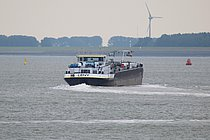

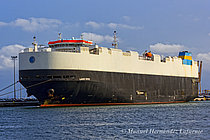

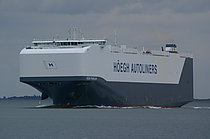

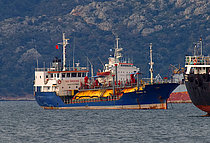

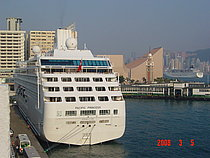

In [12]:
ship_images
for i in ship_images[:5]:
  y = cv2.imread('/content/gdrive/My Drive/Kaggle/train/images/'+i , 1)
  cv2_imshow(y)

In [55]:
# name= '/content/gdrive/My Drive/Kaggle/train/train'
# data = pd.read_csv(name+'.csv')
# images_array = np.array(data['image'])
# labels_array= np.array(data['category'])

In [56]:

# ship_images[0].split('.')[1]

'jpg'

In [ ]:
# for image in ship_images:
#   ids_lst=[]
#   ids= image.split('.')
#   ids_lst.extend(ids)
#   print(ids_lst[:20])
  



In [13]:
ship_labels= pd.read_csv('train/train.csv')
ship_labels.head()

,image,category
0,2823080.jpg,1
1,2870024.jpg,1
2,2662125.jpg,2
3,2900420.jpg,3
4,2804883.jpg,2


In [14]:
ships_dict= {'Cargo': 1, 
'Military': 2, 
'Carrier': 3, 
'Cruise': 4, 
'Tankers': 5}

In [15]:

ships_dict= {k:v for v,k in ships_dict.items()}
ships_dict

{1: 'Cargo', 2: 'Military', 3: 'Carrier', 4: 'Cruise', 5: 'Tankers'}

# New Section

In [ ]:
 # def append_extension(fn):
#   return fn + ".jpg"

In [28]:
train_df= pd.read_csv("train/train.csv", dtype= str)
test_df= pd.read_csv('test_ApKoW4T.csv', dtype= str)

src_path_train= '/content/gdrive/My Drive/Kaggle/train/images'

# train_df['image']= train_df['image'].apply(append_extension)
# test_df['image']= test_df['image'].apply(append_extension)

data_generator= ImageDataGenerator(rescale= 1./255., validation_split=0.25)

In [30]:
train_generator= data_generator.flow_from_dataframe(
    dataframe=train_df, directory= src_path_train, x_col='image', y_col= 'category', subset= 'training', target_size=(64, 64),
    batch_size=29, seed= 42, shuffle= True,  class_mode='categorical', #validate_filenames=False
)
validation_generator= data_generator.flow_from_dataframe(
    dataframe=train_df, directory= src_path_train, x_col='image', y_col= 'category', subset= 'validation', target_size=(64,64),
     batch_size= 29, seed= 42, shuffle= True,  class_mode='categorical', #validate_filenames=False
)

# test_data_generator= ImageDataGenerator(rescale= 1./255.)

# test_generator= data_generator.flow_from_dataframe(
#     dataframe= test_df, directory= 'test_ApKoW4T.csv', x_col='image', y_col= None, subset= 'validation', target_size=(64,64),
#      batch_size= 29, seed= 42, shuffle= False,  class_mode= None, validate_filenames=False
# )

Found 4689 validated image filenames belonging to 5 classes.
Found 1563 validated image filenames belonging to 5 classes.


In [33]:
def prepare_model():
  model= Sequential()
  model.add(Conv2D(32, kernel_size= (3,3), activation='relu', input_shape=(64,64,3)))
  model.add(Flatten())
  model.add(Dense(5, activation= 'sigmoid'))
  model.compile(loss= 'categorical_crossentropy', optimizer= 'adam', metrics= ['accuracy'])
  return model


In [35]:
simple_model= prepare_model()
simple_model.fit(train_generator, 
                    validation_data= train_generator,
                    steps_per_epoch= train_generator.n//train_generator.batch_size,
                    validation_steps= validation_generator.n//validation_generator.batch_size,
                    epochs= 3  
                    )

Epoch 1/3
161/161 [==============================] - 1390s 9s/step - loss: 3.3207 - accuracy: 0.3504 - val_loss: 0.9330 - val_accuracy: 0.6799
Epoch 2/3
161/161 [==============================] - 10s 65ms/step - loss: 0.8740 - accuracy: 0.6834 - val_loss: 0.6728 - val_accuracy: 0.7469
Epoch 3/3
161/161 [==============================] - 10s 63ms/step - loss: 0.6295 - accuracy: 0.7901 - val_loss: 0.5322 - val_accuracy: 0.8178


In [25]:
next(train_generator)

(array([[[[0.5176471 , 0.627451  , 0.7137255 ],
          [0.5176471 , 0.627451  , 0.7137255 ],
          [0.5176471 , 0.627451  , 0.7137255 ],
          ...,
          [0.5294118 , 0.6313726 , 0.72156864],
          [0.5294118 , 0.6313726 , 0.72156864],
          [0.53333336, 0.63529414, 0.7254902 ]],
 
         [[0.5137255 , 0.62352943, 0.70980394],
          [0.5137255 , 0.62352943, 0.70980394],
          [0.5137255 , 0.62352943, 0.70980394],
          ...,
          [0.5294118 , 0.6313726 , 0.72156864],
          [0.5294118 , 0.6313726 , 0.72156864],
          [0.5294118 , 0.6313726 , 0.72156864]],
 
         [[0.5176471 , 0.61960787, 0.70980394],
          [0.5176471 , 0.61960787, 0.70980394],
          [0.5176471 , 0.61960787, 0.70980394],
          ...,
          [0.5294118 , 0.6313726 , 0.72156864],
          [0.5294118 , 0.6313726 , 0.72156864],
          [0.5294118 , 0.6313726 , 0.72156864]],
 
         ...,
 
         [[0.454902  , 0.5372549 , 0.6117647 ],
          [0.43921

In [26]:
train_generator.image_shape

(64, 64, 3)

In [ ]:
validation_generator.image_shape

In [ ]:
train_generator.labels

In [24]:
mlp_model= Sequential()
mlp_model.add(Flatten(input_shape=(64,64,3)))
mlp_model.add(Dense(32,activation='relu'))
mlp_model.add(Dense(5, activation='softmax'))
mlp_model.compile(optimizers.RMSprop(learning_rate=0.0001, decay=1e-6),loss="categorical_crossentropy",metrics=["accuracy"])
mlp_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 12288)             0         
_________________________________________________________________
dense (Dense)                (None, 32)                393248    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 165       
Total params: 393,413
Trainable params: 393,413
Non-trainable params: 0
_________________________________________________________________


In [25]:
history= mlp_model.fit(train_generator, epochs=2, validation_data=validation_generator)

Epoch 1/2
  59977/Unknown - 5167s 86ms/step - loss: 1.0126 - accuracy: 0.6026

KeyboardInterrupt: ignored

In [26]:
cnn_model= Sequential()
cnn_model.add(Conv2D(filters=32, kernel_size= (3,3), activation= 'relu', input_shape=(64,64,3)))
cnn_model.add(Flatten())
cnn_model.add(Dense(5, activation='softmax'))
cnn_model.compile(optimizers.RMSprop(learning_rate=0.01, decay=1e-4),loss="categorical_crossentropy",metrics=['accuracy'])
cnn_model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
flatten_1 (Flatten)          (None, 123008)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 615045    
Total params: 615,941
Trainable params: 615,941
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cnn_model.fit(train_generator, epochs=2, validation_data=validation_generator)

Epoch 1/2
 133866/Unknown - 14443s 108ms/step - loss: 0.1498 - accuracy: 0.9850

In [ ]:
print('Number of Samples: ', train_generator.samples)
print('Number of Classes: ', len(set(train_generator.classes)))
print('Number of Samples per Class (roughly): ', int(train_generator.samples)/len(train_generator.class_indices))

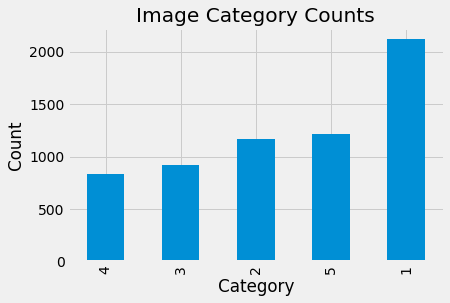

In [54]:
train_df.category.value_counts(ascending=True).plot(kind='bar')
plt.title('Image Category Counts')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [89]:
model = Sequential()
# hidden layer
model.add(Dense(100, input_shape=(784,), activation='relu'))
# output layer
model.add(Dense(5, activation='softmax'))

In [90]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=validation_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=10
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


FileNotFoundError: ignored

In [27]:
model = Sequential()

In [28]:

model.add(Dense(12, activation= 'relu', input_dim= 64))
model.add(Dense(8, activation= 'relu'))
model.add(Dense(1, activation= 'softmax'))


In [30]:

model.compile(optimizer= 'rmsprop', 
              loss= 'categorical_crossentropy', 
              metrics= 'accuracy')


In [26]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size
model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=validation_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=10
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


FileNotFoundError: ignored

In [ ]:
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec

In [ ]:
import os

cwd = os.getcwd()  # Get the current working directory (cwd)
files = os.listdir(cwd)  # Get all the files in that directory
print("Files in %r: %s" % (cwd, files))

Files in '/content/gdrive/My Drive/Kaggle': ['sample_submission_ns2btKE.csv', 'test_ApKoW4T.csv', 'kaggle.json', 'train']


In [ ]:
path='../content/gdrive/MyDrive/Kaggle/train/images/'
img_name = sorted(os.listdir('/content/gdrive/My Drive/Kaggle/train/images/'))
img_paths = []
for i in img_name:
    img_paths.append(path + i)
  




In [ ]:
train_labels= train_df

In [ ]:
img_shape=64
img_path

'../content/gdrive/MyDrive/Kaggle/train/images/2823080.jpg'

In [ ]:
for i in train_labels.iterrows() :
    img_path = os.path.join(path, i[1]['image'])
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(img_shape, img_shape), interpolation='lanczos')
    img = tf.keras.preprocessing.image.img_to_array(img)
    X.append(img)
    y.append(float(i[1]['category']))

FileNotFoundError: ignored

/content/gdrive/My Drive/Kaggle


In [ ]:
labels= tf.data.experimental.make_csv_dataset('train/train.csv', batch_size= 29)

In [ ]:
def label_img(img):
  word_label= img.split('.')[-3]

In [ ]:
#getting all the training data(8932 images)
train_data_dir= 'train'


In [ ]:
train_labels = pd.read_csv('train/train.csv')


In [ ]:

train_images= next(train_generator)

FileNotFoundError: ignored

In [ ]:
np.shape(train_labels)

(6252, 2)

In [ ]:
train_labels_array= np.array(train_labels)
train_images

NameError: ignored

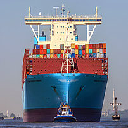

In [ ]:
array_to_img(train_images[5])

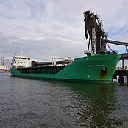

In [ ]:
array_to_img(train_images[40])

In [ ]:
#looking at shape of train images and labels
print(np.shape(train_images))
print(np.shape(train_labels))

(8932, 64, 64, 3)
(8932, 1)


In [75]:
train_labels

NameError: ignored

In [79]:
X_train

NameError: ignored